### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?


Based on description there are two variables: condition and time. Since we want to observe differences in time values for people from different groups (conditions) **the time is dependent variable** and **condition is not**.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

a. Color words whose names match the colors takes less time to recognise as opposed to those whose names and colors dont match.     
Without taking a look at data and based only on description we would have only 2 vars so our hypothesis would be as follows:

H$_{0}$: Recognition of words with colors that dont match their names takes same amount of time as for those whose names do match the colors.
H$_{1}$ It is reasonable to conclude that the one needs more time to recognise the color if color and text dont match.

We are given observation of participants and their time for both experiments. To support or reject our hypothesizes we will be looking into population **means (µ$_{inc}$ - Incongruent group , µ$_{con}$ - Congruent group)**.

H$_{0}$: µ$_{inc}$ = µ$_{con}$    
H$_{1}$: µ$_{inc}$ >  µ$_{con}$ 

We can rewrite equation as difference in means of both groups:    
H$_{0}$: µ$_{inc}$ - µ$_{con}$ = 0    
H$_{1}$: µ$_{inc}$ - µ$_{con}$ > 0    

b. Since each participant go through both tests and we have two samples (related) for each user it makes sense to compare their diffirence and get mean value of it to see if it is statistically significant. That is exactly what paired T-test does. 


In [2]:
import pandas as pd
df = pd.read_csv("stroopdata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


We are provided with 24 rows here and it is not an entire population of course, that is just a sample and to generalize to entire popolation we will need to use sample standard deviation and random sampling.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
# Perform the analysis here
cong_mean = df['Congruent'].mean()
cong_std = df['Congruent'].std(ddof=1)
cong_med = df['Congruent'].median()
incong_mean = df['Incongruent'].mean()
incong_std = df['Incongruent'].std(ddof=1)
incong_med = df['Incongruent'].median()

In [4]:
print("Congruent mean {}, median {}, std {} ".format(cong_mean, cong_med, cong_std))
print("Incongruent mean {}, median {}, std {}".format(incong_mean, incong_med, incong_std))
df.head()

Congruent mean 14.051124999999999, median 14.3565, std 3.5593579576451955 
Incongruent mean 22.015916666666666, median 21.0175, std 4.797057122469138


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


For Congruent group mean is a bit less than median so means distribution could be right skewed.
As for Incongruent mean > median and distribution likely left skewed.

In [5]:
sample_mean_diff = incong_mean - cong_mean
sample_mean_diff

7.9647916666666667

In [71]:
df['Congruent'].max(), df['Incongruent'].max()

(22.328000000000003, 35.255000000000003)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'Number of participants')

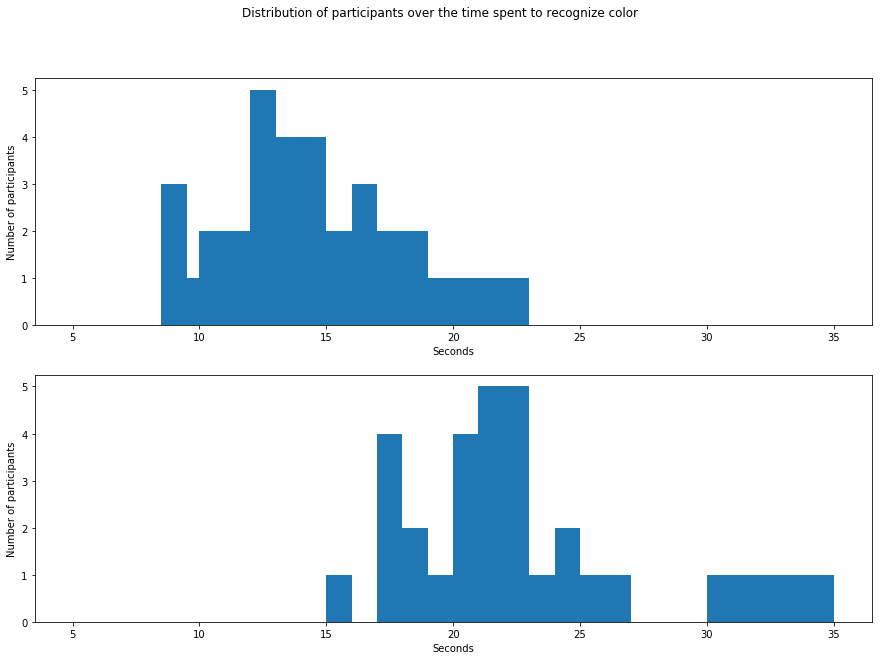

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(nrows=2, sharey=True, figsize=(15, 10))
fig.suptitle("Distribution of participants over the time spent to recognize color")
ax1.hist(df['Congruent'], [5, 7, 8.5, 9.5, 10, 12,13,15, 16,17, 19, 21, 23, 24, 35])
ax1.set_xlabel("Seconds")
ax1.set_ylabel("Number of participants")
ax2.hist(df['Incongruent'], [5, 15, 16, 17, 18, 19, 20,21, 23, 24,25,26, 27, 28, 30, 35])
ax2.set_xlabel("Seconds")
ax2.set_ylabel("Number of participants")

First distribution (congurent) looks like left skewed and second is right skewed. There is a big gap between them and values in second chart looks greater in values fo seconds than the first one.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We have two related samples and we are going to measure how average value is different across samples. This test called paired T-test and it will help us to accept or reject hypothesis that time to recognise colors is the same for both groups.

In [109]:
import scipy.stats as stats
stats.stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

We got our statistic value ~ 8.02007 and really low p value 0.00000004 under 0.05 and that means we have strong evidence to reject our null hypothesis: that there is no difference between two groups.

Another approach to support or reject hypothesis is to bootstrap samples and compare statistic.

In [110]:
p_diffs = []
for _ in range(10000):
    sample_cong = df['Congruent'].sample(24, replace = True)
    sample_incong = df['Incongruent'].sample(24, replace = True)
    p_diffs.append(sample_incong.mean() - sample_cong.mean())

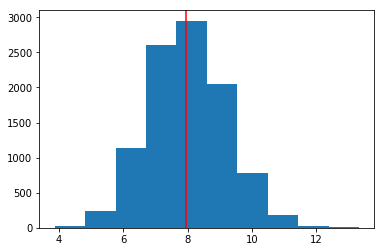

In [111]:
plt.hist(p_diffs)
plt.axvline(x=sample_mean_diff, color='red')

1.19552734933


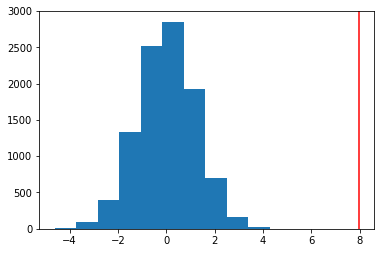

In [113]:
import numpy as np
p_diffs = np.array(p_diffs)
print(p_diffs.std())
null_v = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_v)
plt.axvline(x=sample_mean_diff, color='red')

Statistic is not from the null hypothesis and we have to reject H$_{0}$ in favour of H$_{1}$.